In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from collections import Counter
import math

def create_synthetic_data(num_samples=100):
    """
    Generates a synthetic dataset for a Decision Tree assignment.
    It includes both continuous features and a categorical target variable.
    """
    data = {'MEG0011': np.random.rand(num_samples) * 100,
            'MEG0012': np.random.randn(num_samples) * 20 + 50,
            'MEG0013': np.random.randint(0, 5, num_samples),
            'MEG0014': np.random.rand(num_samples) * 50 + 10}
    df = pd.DataFrame(data)

    # Create a categorical target based on a combination of features
    df['target'] = np.where((df['MEG0011'] > 50) & (df['MEG0012'] < 55), 'Class_A', 'Class_B')

    return df

# Main section
if __name__ == '__main__':
    data = create_synthetic_data()
    print("Synthetic data created:")
    print(data.head())

    # Separate features and target
    X = data.drop('target', axis=1)
    y = data['target']

    # Convert 'MEG0013' to categorical for some tasks if needed
    X['MEG0013'] = X['MEG0013'].astype('category')

Synthetic data created:
     MEG0011    MEG0012  MEG0013    MEG0014   target
0  43.969347  -4.603714        1  24.505880  Class_B
1  42.249734  20.621887        2  45.181709  Class_B
2  46.466525  56.477659        3  32.100652  Class_B
3  30.345486  34.751684        4  30.649224  Class_B
4  23.368013  17.981853        4  44.710576  Class_B


In [2]:
def equal_width_binning(data, num_bins=4):
    """
    Performs equal width binning on a continuous data column.
    """
    bins = np.linspace(min(data), max(data), num_bins + 1)
    binned_data = pd.cut(data, bins, labels=False, include_lowest=True)
    return binned_data

def calculate_entropy(data_series):
    """
    Calculates the entropy of a given data series (categorical).
    """
    counts = Counter(data_series)
    total_count = len(data_series)
    entropy = 0
    for count in counts.values():
        probability = count / total_count
        if probability > 0:
            entropy -= probability * math.log2(probability)
    return entropy

# Main section
if __name__ == '__main__':
    data = create_synthetic_data()

    # Binning the continuous 'MEG0011' feature
    binned_meg = equal_width_binning(data['MEG0011'])

    # Calculating entropy
    entropy_target = calculate_entropy(data['target'])
    entropy_binned_meg = calculate_entropy(binned_meg)

    print("\n--- A1. Entropy Calculation ---")
    print(f"Entropy of the 'target' variable: {entropy_target:.4f}")
    print(f"Entropy of the binned 'MEG0011' feature: {entropy_binned_meg:.4f}")


--- A1. Entropy Calculation ---
Entropy of the 'target' variable: 0.8813
Entropy of the binned 'MEG0011' feature: 1.9625


In [3]:
import pandas as pd
import numpy as np
from collections import Counter

def create_synthetic_data(num_samples=100):
    """
    Generates a synthetic dataset for a Decision Tree assignment.
    It includes both continuous features and a categorical target variable.
    """
    data = {'MEG0011': np.random.rand(num_samples) * 100,
            'MEG0012': np.random.randn(num_samples) * 20 + 50,
            'MEG0013': np.random.randint(0, 5, num_samples),
            'MEG0014': np.random.rand(num_samples) * 50 + 10}
    df = pd.DataFrame(data)

    # Create a categorical target based on a combination of features
    df['target'] = np.where((df['MEG0011'] > 50) & (df['MEG0012'] < 55), 'Class_A', 'Class_B')

    return df

def calculate_gini_index(data_series):
    """
    Calculates the Gini Index of a given data series.
    """
    counts = Counter(data_series)
    total_count = len(data_series)
    gini = 1.0
    for count in counts.values():
        probability = count / total_count
        gini -= probability**2
    return gini

# Main section
if __name__ == '__main__':
    data = create_synthetic_data()
    gini_target = calculate_gini_index(data['target'])

    print("\n--- A2. Gini Index Calculation ---")
    print(f"Gini Index of the 'target' variable: {gini_target:.4f}")


--- A2. Gini Index Calculation ---
Gini Index of the 'target' variable: 0.3648


In [6]:
import pandas as pd
import numpy as np
from collections import Counter
import math

def create_synthetic_data(num_samples=100):
    """
    Generates a synthetic dataset for a Decision Tree assignment.
    It includes both continuous features and a categorical target variable.
    """
    data = {'MEG0011': np.random.rand(num_samples) * 100,
            'MEG0012': np.random.randn(num_samples) * 20 + 50,
            'MEG0013': np.random.randint(0, 5, num_samples),
            'MEG0014': np.random.rand(num_samples) * 50 + 10}
    df = pd.DataFrame(data)

    # Create a categorical target based on a combination of features
    df['target'] = np.where((df['MEG0011'] > 50) & (df['MEG0012'] < 55), 'Class_A', 'Class_B')

    return df

def calculate_entropy(data_series):
    """
    Calculates the entropy of a given data series (categorical).
    """
    counts = Counter(data_series)
    total_count = len(data_series)
    entropy = 0
    for count in counts.values():
        probability = count / total_count
        if probability > 0:
            entropy -= probability * math.log2(probability)
    return entropy

def equal_width_binning(data, num_bins=4):
    """
    Performs equal width binning on a continuous data column.
    """
    bins = np.linspace(min(data), max(data), num_bins + 1)
    binned_data = pd.cut(data, bins, labels=False, include_lowest=True)
    return binned_data

def calculate_information_gain(data, feature, target):
    """
    Calculates the information gain for a given feature.
    """
    # Calculate initial entropy of the entire dataset
    initial_entropy = calculate_entropy(data[target])

    # Create a contingency table for the feature and target
    contingency_table = pd.crosstab(data[feature], data[target])

    # Calculate the weighted entropy after splitting on the feature
    weighted_entropy = 0
    total_rows = len(data)
    for value in contingency_table.index:
        subset_entropy = calculate_entropy(data[data[feature] == value][target])
        subset_weight = len(data[data[feature] == value]) / total_rows
        weighted_entropy += subset_weight * subset_entropy

    information_gain = initial_entropy - weighted_entropy
    return information_gain

def find_best_root_node(data, target_col):
    """
    Finds the best feature for the root node based on Information Gain.
    """
    features = data.drop(target_col, axis=1).columns
    max_gain = -1
    best_feature = None

    for feature in features:
        # Bin continuous features before calculating gain
        if pd.api.types.is_numeric_dtype(data[feature]) and data[feature].dtype != 'category':
            binned_data = data.copy()
            binned_data[feature] = equal_width_binning(binned_data[feature])
            gain = calculate_information_gain(binned_data, feature, target_col)
        else:
            gain = calculate_information_gain(data, feature, target_col)

        if gain > max_gain:
            max_gain = gain
            best_feature = feature

    return best_feature, max_gain

# Main section
if __name__ == '__main__':
    data = create_synthetic_data()
    best_feature, max_gain = find_best_root_node(data, 'target')

    print("\n--- A3. Best Root Node by Information Gain ---")
    print(f"The best feature for the root node is: '{best_feature}'")
    print(f"Information Gain for this feature: {max_gain:.4f}")


--- A3. Best Root Node by Information Gain ---
The best feature for the root node is: 'MEG0011'
Information Gain for this feature: 0.3281


In [7]:
def binning(data, num_bins=4, bin_type='equal_width'):
    """
    Performs equal-width or equal-frequency binning on a continuous data column.
    """
    if bin_type == 'equal_width':
        bins = np.linspace(min(data), max(data), num_bins + 1)
        binned_data = pd.cut(data, bins, labels=False, include_lowest=True)
    elif bin_type == 'equal_frequency':
        binned_data = pd.qcut(data, num_bins, labels=False, duplicates='drop')
    else:
        raise ValueError("Invalid bin_type. Choose 'equal_width' or 'equal_frequency'.")

    return binned_data

# Function overloading via default arguments
def binning(data, num_bins=4, bin_type='equal_width'):
    """
    Overloaded function for binning with default parameters.
    """
    if bin_type == 'equal_width':
        bins = np.linspace(min(data), max(data), num_bins + 1)
        binned_data = pd.cut(data, bins, labels=False, include_lowest=True)
    elif bin_type == 'equal_frequency':
        binned_data = pd.qcut(data, num_bins, labels=False, duplicates='drop')
    else:
        raise ValueError("Invalid bin_type. Choose 'equal_width' or 'equal_frequency'.")

    return binned_data

# Main section
if __name__ == '__main__':
    data = create_synthetic_data()

    # Equal-width binning (default parameters)
    binned_width = binning(data['MEG0011'])

    # Equal-frequency binning
    binned_freq = binning(data['MEG0011'], bin_type='equal_frequency')

    print("\n--- A4. Equal Width and Frequency Binning ---")
    print("Equal-width binning labels (first 10):", binned_width[:10].tolist())
    print("Equal-frequency binning labels (first 10):", binned_freq[:10].tolist())


--- A4. Equal Width and Frequency Binning ---
Equal-width binning labels (first 10): [1, 0, 2, 1, 2, 3, 0, 3, 0, 0]
Equal-frequency binning labels (first 10): [2, 0, 2, 1, 2, 3, 0, 3, 1, 0]


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def create_synthetic_data(num_samples=100):
    """
    Generates a synthetic dataset for a Decision Tree assignment.
    It includes both continuous features and a categorical target variable.
    """
    data = {'MEG0011': np.random.rand(num_samples) * 100,
            'MEG0012': np.random.randn(num_samples) * 20 + 50,
            'MEG0013': np.random.randint(0, 5, num_samples),
            'MEG0014': np.random.rand(num_samples) * 50 + 10}
    df = pd.DataFrame(data)

    # Create a categorical target based on a combination of features
    df['target'] = np.where((df['MEG0011'] > 50) & (df['MEG0012'] < 55), 'Class_A', 'Class_B')

    return df

def build_decision_tree_module(X_train, y_train):
    """
    Builds a Decision Tree classifier using scikit-learn.
    """
    # Use Gini as the impurity measure
    dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
    dt_classifier.fit(X_train, y_train)
    return dt_classifier

# Main section
if __name__ == '__main__':
    data = create_synthetic_data()
    X = data.drop('target', axis=1)
    y = data['target']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Build and train the Decision Tree
    dt_model = build_decision_tree_module(X_train, y_train)

    print("\n--- A5. Decision Tree Module ---")
    print("Decision Tree model trained successfully.")
    print(f"Model accuracy on training data: {dt_model.score(X_train, y_train):.4f}")
    print(f"Model accuracy on test data: {dt_model.score(X_test, y_test):.4f}")


--- A5. Decision Tree Module ---
Decision Tree model trained successfully.
Model accuracy on training data: 1.0000
Model accuracy on test data: 0.9333



--- A6. Decision Tree Visualization ---


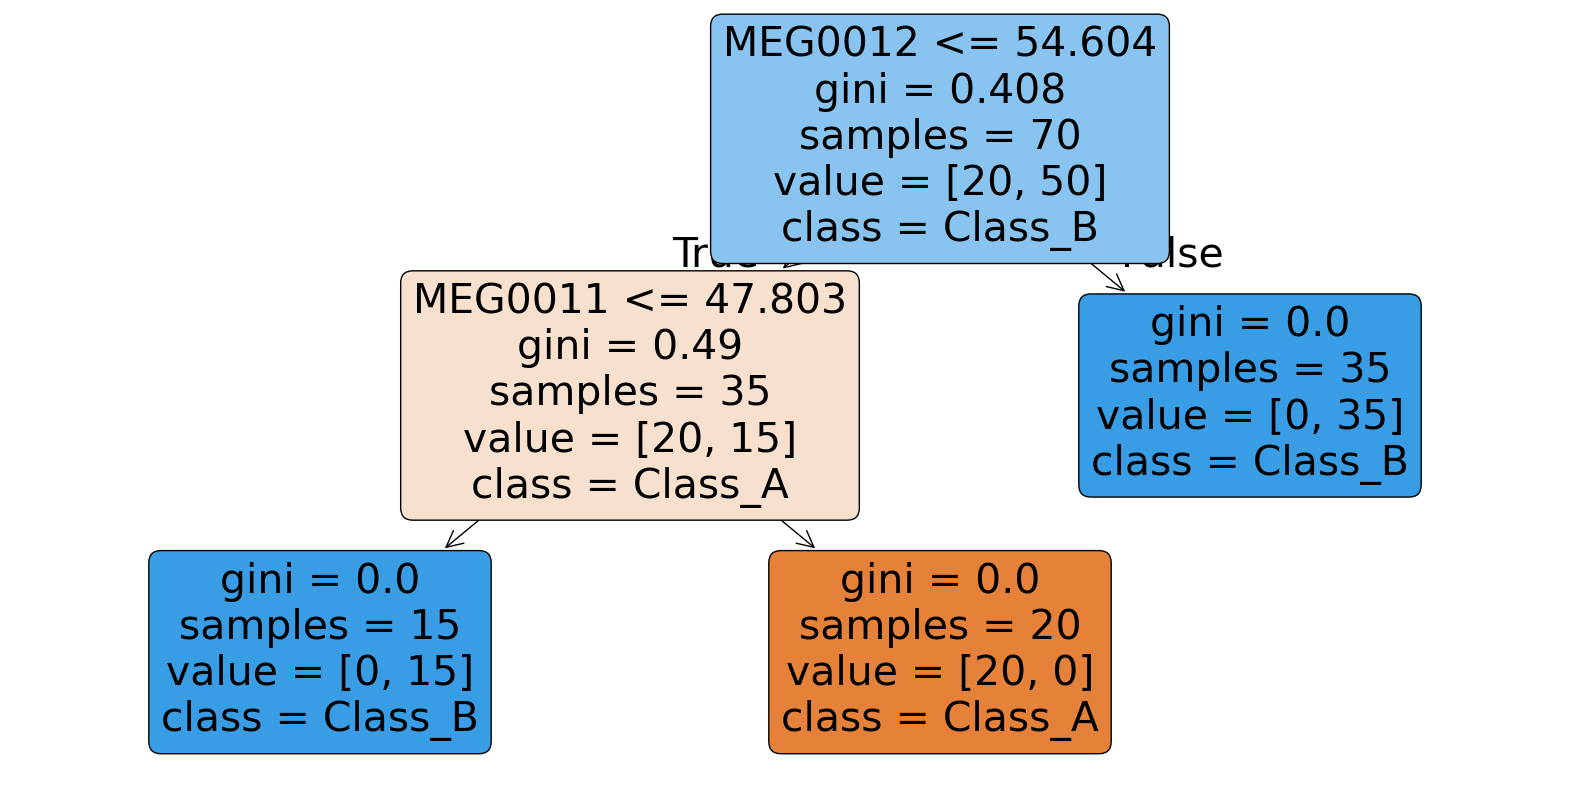

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def visualize_decision_tree(model, feature_names, class_names):
    """
    Draws and visualizes the trained Decision Tree.
    """
    fig, ax = plt.subplots(figsize=(20, 10))
    plot_tree(model,
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              ax=ax)
    plt.show()

# Main section
if __name__ == '__main__':
    data = create_synthetic_data()
    X = data.drop('target', axis=1)
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    dt_model = build_decision_tree_module(X_train, y_train)

    print("\n--- A6. Decision Tree Visualization ---")
    visualize_decision_tree(dt_model, X.columns.tolist(), np.unique(y).tolist())


--- A7. Decision Boundary Visualization ---


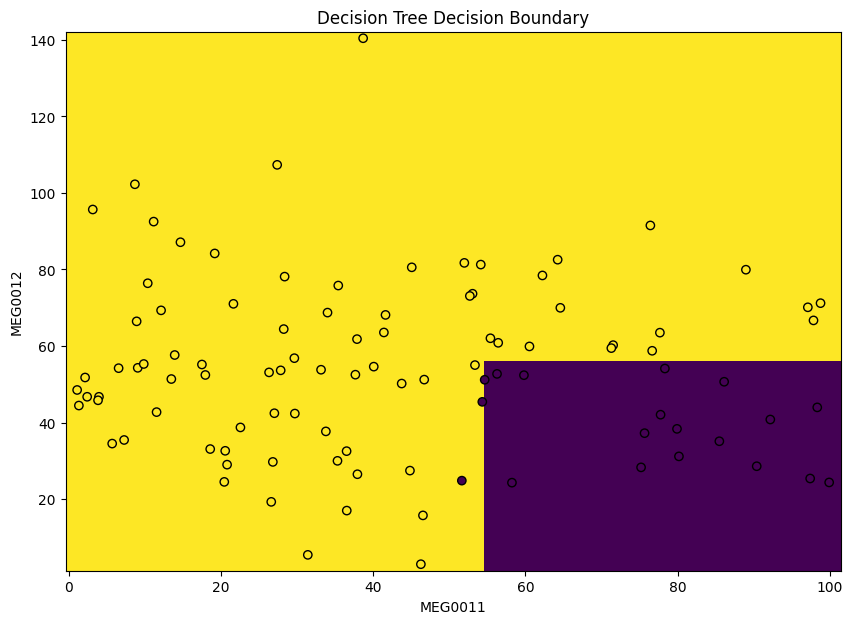

In [11]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def visualize_decision_boundary(model, X, y, feature1_name, feature2_name):
    """
    Visualizes the decision boundary of the Decision Tree classifier.
    """
    X_subset = X[[feature1_name, feature2_name]]

    # Encode the target labels to numerical for plotting
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Plot the decision boundary
    plt.figure(figsize=(10, 7))
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        model,
        X_subset,
        ax=ax,
        plot_method="pcolormesh",
        xlabel=feature1_name,
        ylabel=feature2_name,
        response_method="predict",
        shading="auto"
    )

    # Plot the data points
    plt.scatter(X_subset.iloc[:, 0], X_subset.iloc[:, 1], c=y_encoded, edgecolors='k')
    plt.title("Decision Tree Decision Boundary")
    plt.show()

# Main section
if __name__ == '__main__':
    data = create_synthetic_data()
    X = data.drop('target', axis=1)
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a new model on only the two features
    dt_model_2d = DecisionTreeClassifier(random_state=42).fit(X_train[['MEG0011', 'MEG0012']], y_train)

    print("\n--- A7. Decision Boundary Visualization ---")
    visualize_decision_boundary(dt_model_2d, X, y, 'MEG0011', 'MEG0012')